In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint

In [122]:
data_path = '011/text_data/'

ada_joy = data_path + 'ada_joy.csv'
assistance_info = data_path + 'assistance_info.csv'
gaze_positions = data_path + 'gaze_positions.csv'
input_info = data_path + 'input_info.csv'
joint_positions = data_path + 'joint_positions.csv'
myo_emg = data_path + 'myo_emg.csv'
myo_imu = data_path + 'myo_imu.csv'
myo_ori = data_path + 'myo_ori.csv'
pupil_cal_eye0 = data_path + 'pupil_cal_eye0.csv'
pupil_cal_eye1 = data_path + 'pupil_cal_eye1.csv'
pupil_eye0 = data_path + 'pupil_eye0.csv'
pupil_eye1 = data_path + 'pupil_eye1.csv'
robot_position = data_path + 'robot_position.csv'
world_cal_positions = data_path + 'world_cal_positions.csv'

In [123]:
# reading data that are separated by ';'

joint_positions_df = pd.read_csv(joint_positions)
data = joint_positions_df
# df = pd.read_csv('RNN\\data.csv', sep=';')
data.head()
data

,timestamp,world_index,world_index_corrected,mico_joint_1_pos,mico_joint_2_pos,mico_joint_3_pos,mico_joint_4_pos,mico_joint_5_pos,mico_joint_6_pos,mico_joint_finger_1_pos,...,mico_joint_finger_1_vel,mico_joint_finger_2_vel,mico_joint_1_eff,mico_joint_2_eff,mico_joint_3_eff,mico_joint_4_eff,mico_joint_5_eff,mico_joint_6_eff,mico_joint_finger_1_eff,mico_joint_finger_2_eff
0,0.004182,0,0,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.229099,-6.385801,4.658315,0.606795,0.187329,-0.081978,0.0,0.0
1,0.016107,0,0,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.569365,-6.309839,4.843127,0.668915,-0.004031,-0.206539,0.0,0.0
2,0.028375,0,0,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.158463,-6.414532,4.747701,0.629657,-0.045431,-0.048800,0.0,0.0
3,0.041347,1,1,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.274651,-6.132005,4.528835,0.464742,0.055352,-0.322553,0.0,0.0
4,0.053160,1,1,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.457999,-6.242330,4.788630,0.692414,0.082428,-0.178603,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,84.698286,2496,2540,-0.374412,0.641986,-2.588156,-2.554924,-1.211417,6.791314,0.947333,...,0.0,0.0,0.470086,-11.145346,4.782941,2.248450,1.062521,0.017723,0.0,0.0
7020,84.710360,2497,2541,-0.374412,0.641986,-2.588156,-2.554924,-1.211417,6.791314,0.947333,...,0.0,0.0,0.218037,-11.042253,5.021476,2.398823,1.090828,-0.238277,0.0,0.0
7021,84.722268,2497,2541,-0.374412,0.641986,-2.588156,-2.554924,-1.211417,6.791314,0.947333,...,0.0,0.0,0.182997,-10.862659,4.842467,2.381991,1.328074,-0.104505,0.0,0.0
7022,84.734067,2497,2541,-0.374412,0.641986,-2.588156,-2.554924,-1.211417,6.791314,0.947333,...,0.0,0.0,0.420679,-11.550407,4.479917,2.180943,1.222952,-0.207899,0.0,0.0


In [124]:
#  normalizing data of passengers

# Extracting the "Passengers" column
mico_joint_1_pos = data['mico_joint_1_pos'].values

data = data.fillna(data.select_dtypes(include=[np.number]).mean())

# Replacing the original "Passengers" column with the normalized values
# data['Passengers'] = normalized_passengers

# Displaying the DataFrame with normalized values
print(data.shape)

data.head()

(7024, 27)


,timestamp,world_index,world_index_corrected,mico_joint_1_pos,mico_joint_2_pos,mico_joint_3_pos,mico_joint_4_pos,mico_joint_5_pos,mico_joint_6_pos,mico_joint_finger_1_pos,...,mico_joint_finger_1_vel,mico_joint_finger_2_vel,mico_joint_1_eff,mico_joint_2_eff,mico_joint_3_eff,mico_joint_4_eff,mico_joint_5_eff,mico_joint_6_eff,mico_joint_finger_1_eff,mico_joint_finger_2_eff
0,0.004182,0,0,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.229099,-6.385801,4.658315,0.606795,0.187329,-0.081978,0.0,0.0
1,0.016107,0,0,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.569365,-6.309839,4.843127,0.668915,-0.004031,-0.206539,0.0,0.0
2,0.028375,0,0,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.158463,-6.414532,4.747701,0.629657,-0.045431,-0.048800,0.0,0.0
3,0.041347,1,1,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.274651,-6.132005,4.528835,0.464742,0.055352,-0.322553,0.0,0.0
4,0.053160,1,1,-1.212747,-1.346534,-0.560174,-2.247905,0.750888,4.505329,0.947333,...,0.0,0.0,0.457999,-6.242330,4.788630,0.692414,0.082428,-0.178603,0.0,0.0


In [125]:
# import numpy as np

# def sliding_window(a, window):
#     shape = (a.shape[0] - window + 1, window)
#     strides = (a.strides[0], a.strides[0])
#     return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


# passengers = data['Passengers'].values.astype(float)
# passengers = df['Passengers'].values.astype(float)


# # Converting DataFrame column to numpy array and apply sliding window
# window_size = 6
# result = sliding_window(passengers, window_size)

# print(result)


In [126]:
# def create_sequences(data, target, sequence_length):
#     X, y = [], []
#     for i in range(len(data) - sequence_length):
#         X.append(data[i:i+sequence_length])
#         y.append(target[i+sequence_length-1])
#     return X, y


In [131]:
def slide_window(dataset, target, n_steps=1):
    X, y = [], []
    for i in range(len(dataset) - n_steps - 1):
        end_ix = i + n_steps
        if end_ix > len(dataset) - 1:
            break
        seq_x = dataset[i:end_ix]
        seq_y = target[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Example data
data_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target = [101, 102, 103, 104, 105, 106, 107, 108, 109, 110]

# mat = np.column_stack((data, target))

# Create sequences
sequence_length = 3
X, y = slide_window(np.array(data_test),np.array(target), sequence_length)

print("Input Sequences:")
for sequence in X:
    print(sequence)

print("Target Values:")
print(y)

# X.shape

Input Sequences:
[1 2 3]
[2 3 4]
[3 4 5]
[4 5 6]
[5 6 7]
[6 7 8]
Target Values:
[104 105 106 107 108 109]


In [132]:
target_variable = 'mico_joint_1_pos'

# Identify redundant features and drop them (you may customize this based on your data)
redundant_features = ['world_index_x', 'world_index_corrected_x', 'world_index_y', 'world_index_corrected_y','timestamp']
redundant_features = [col for col in redundant_features if col in data.columns]  # Check if columns exist
data = data.drop(columns=redundant_features)

# Select features and target variable
features = data.drop(columns=target_variable)
target = data[target_variable]

# Check for highly correlated features and drop if necessary
correlation_matrix = features.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(np.abs(upper_triangle[column]) > 0.95)]
features = features.drop(columns=to_drop)

# Confirm the selected features and target variable
print("Selected Features:", features.shape)
print("Target Variable:", target_variable)

Selected Features: (7024, 24)
Target Variable: mico_joint_1_pos


In [133]:
# converting my data to numpy array
data_np = data.to_numpy()
features_np = features.to_numpy()
target_np = target.to_numpy()
# spliting data_np to two arrays using a new function 
print(data_np.shape)
print(features_np.shape)
print(target_np.shape)
vector1 = data_np[:, 0]  # All rows, first column
vector2 = data_np[:, 1]  # All rows, second column
print(vector1)
print(vector2)

(7024, 26)
(7024, 24)
(7024,)
[   0.    0.    0. ... 2497. 2497. 2498.]
[   0.    0.    0. ... 2541. 2541. 2542.]


In [134]:
target.shape

(7024,)

In [147]:
x,y=slide_window(features_np,target_np, 6)

# y.shape,x.shape

x.shape,y.shape


((7017, 6, 24), (7017,))

In [148]:
# slide_window(features_np,target_np, 6)[0][0], slide_window(features_np,target_np, 5)[0][1]
x[0].shape

(6, 24)

In [149]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.33, random_state= False)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

# geting Xval and Yval from Xtrain and Ytrain
Xtest, Xval, Ytest, Yval = train_test_split(Xtest, Ytest, test_size=0.5, random_state= False)
Xtrain.shape, Xval.shape, Ytrain.shape, Yval.shape
# Ytrain,Xtrain


((4701, 6, 24), (1158, 6, 24), (4701,), (1158,))

In [88]:
#split into train and test sets
# size = 3
# win_data = slide_window(data_np, size)
# train_size = int(len(win_data)*0.7) 
# test_size = len(win_data) -train_size
# train, test=win_data[0:train_size,:], win_data[train_size: len(win_data),:]
# test, validation= test[0: int(test_size/2), :], test[int (test_size/2): len(test), :]
# print(len(train), len(test), len(validation))


In [150]:
Xtrain.shape

Xtrain[0].shape

(6, 24)

In [152]:
look_back = 6
# x_train = np.reshape(Xtrain, (Xtrain.shape[0], look_back, Xtrain.shape[1])).astype('float32')
# x_test = np.reshape(Xtest, (Xtest.shape[0], look_back, Xtest.shape[1])).astype('float32')
# x_val = np.reshape(Xval, (Xval.shape[0], look_back, Xval.shape[1])).astype('float32')
# x_validation = np.reshape(Xval, (Xval.shape[0], look_back, Xval.shape[1]))

In [16]:
# np.shape(x_train), np.shape(x_test), np.shape(x_val) , np.shape(Ytrain), np.shape(Ytest), np.shape(Yval)

((4703, 1, 3), (1158, 1, 3), (1159, 1, 3), (4703,), (1158,), (1159,))

In [153]:
y_train = Ytrain.reshape(Ytrain.shape[0],1).astype('float32')
y_test = Ytest.reshape(Ytest.shape[0],1).astype('float32')
y_val = Yval.reshape(Yval.shape[0],1).astype('float32')
np.shape(y_train), np.shape(y_test), np.shape(y_val)
y_val.shape

(1158, 1)

In [155]:
# Adding the necessary imports for EarlyStopping
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

num_epochs =1000
batch_size=256
sequence_length = Xtrain.shape[1]
input_dim= Xtrain.shape[2]
output_dim= 1
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, input_dim)))
# model.add(BatchNormalization())
model.add(Dropout (0.2))
model.add(LSTM(128, return_sequences=False, input_shape=(sequence_length, input_dim)))
# model.add(BatchNormalization())
model.add(Dropout (0.2))
# model.add(Dense(1))
model.add((Dense (output_dim)))
model.add(Activation("linear"))
es= EarlyStopping(monitor='val_loss', min_delta=0, patience=6, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
model.compile(loss="mse", optimizer="adam", metrics=['mean_squared_error','mean_absolute_percentage_error']) 
history = model.fit(Xtrain, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(Xval, y_val), shuffle=False)


Epoch 1/1000
19/19 [==============================] - 4s 64ms/step - loss: 0.2846 - mean_squared_error: 0.2846 - mean_absolute_percentage_error: 62.7166 - val_loss: 0.1740 - val_mean_squared_error: 0.1740 - val_mean_absolute_percentage_error: 47.5517
Epoch 2/1000
19/19 [==============================] - 0s 17ms/step - loss: 0.1520 - mean_squared_error: 0.1520 - mean_absolute_percentage_error: 52.0595 - val_loss: 0.1019 - val_mean_squared_error: 0.1019 - val_mean_absolute_percentage_error: 42.4255
Epoch 3/1000
19/19 [==============================] - 0s 13ms/step - loss: 0.0901 - mean_squared_error: 0.0901 - mean_absolute_percentage_error: 39.7220 - val_loss: 0.0428 - val_mean_squared_error: 0.0428 - val_mean_absolute_percentage_error: 26.6987
Epoch 4/1000
19/19 [==============================] - 0s 12ms/step - loss: 0.0488 - mean_squared_error: 0.0488 - mean_absolute_percentage_error: 25.1459 - val_loss: 0.0181 - val_mean_squared_error: 0.0181 - val_mean_absolute_percentage_error: 16.5

In [156]:

# Evaluating the model on the test data
loss = model.evaluate(Xtest, y_test)

# Printing the loss (MSE, by default)
print(f"Mean Squared Error (MSE): {loss}")

# We can also calculate other metrics like MAE, RMSE, etc. if needed
# For example, if you want to calculate RMSE:
from sklearn.metrics import mean_squared_error
import math

y_pred = model.predict(Xtest)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


37/37 [==============================] - 1s 8ms/step - loss: 7.6610e-04 - mean_squared_error: 7.6610e-04 - mean_absolute_percentage_error: 2.7600
Mean Squared Error (MSE): [0.0007661036215722561, 0.0007661036215722561, 2.7599923610687256]
37/37 [==============================] - 1s 3ms/step
Root Mean Squared Error (RMSE): 0.02767857694268721


 8/37 [=====>........................] - ETA: 0s

37/37 [==============================] - 0s 11ms/step
Mean Absolute Error: 0.020528852939605713
Root Mean Squared Error: 0.02767857694268721


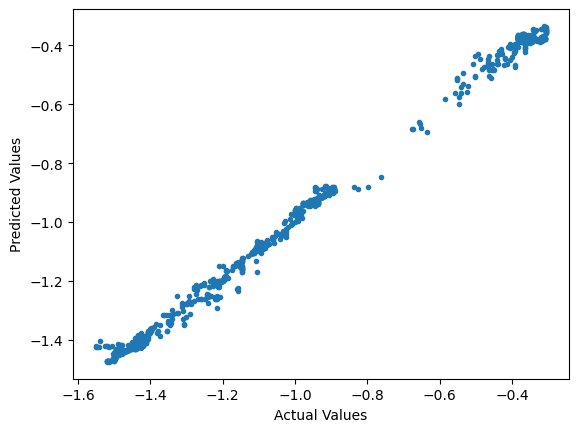

In [157]:
# testing the model

# # Geting the predicted values
y_pred = model.predict(Xtest)

# # Un-normalizing the predicted values
y_pred_actual = y_pred

# # Un-normalizing the test values
y_test_actual = y_test  

# # Calculating MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = math.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# # Ploting the actual values vs the predicted values
plt.plot(y_test_actual, y_pred_actual, linestyle='none', marker='.')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()